In [1]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer, execute
from qiskit.visualization import plot_histogram

In [2]:
svbackend = BasicAer.get_backend('statevector_simulator')
qmbackend = BasicAer.get_backend('qasm_simulator')

# Jozsa Algorithm: 

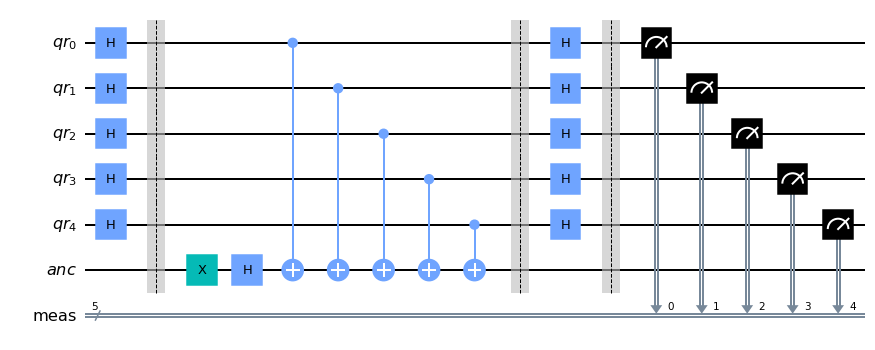

In [5]:
n = 5
qr = QuantumRegister(n, 'qr')
anc = QuantumRegister(1, 'anc')
meas = ClassicalRegister(n, 'meas')
jozsa = QuantumCircuit(qr, anc, meas)
jozsa.h(qr)
jozsa.barrier()

jozsa.x(anc)
jozsa.h(anc)
for control in qr:
    jozsa.cx(control,anc[0])
    
#jozsa.i([0,1,2])

jozsa.barrier()
jozsa.h(qr)
jozsa.barrier()
jozsa.measure(qr,meas)
jozsa.draw('mpl')

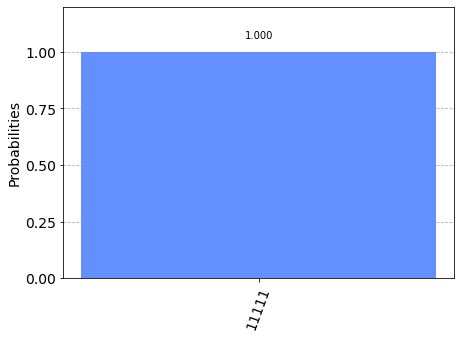

In [6]:
job = execute(jozsa, qmbackend, shots=1)
result = job.result()
plot_histogram(result.get_counts())